# 1 - Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#import train_test_split, LinearRegression, r2_score, mean_squared_error and LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [ ]:
#import the "student_scores.csv" dataframe
df = pd.read_csv("student_scores.csv")

In [ ]:
#show the first 10 rows of the dataframe
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#show the shape of the dataframe
df.shape

(25, 2)

In [ ]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
      )

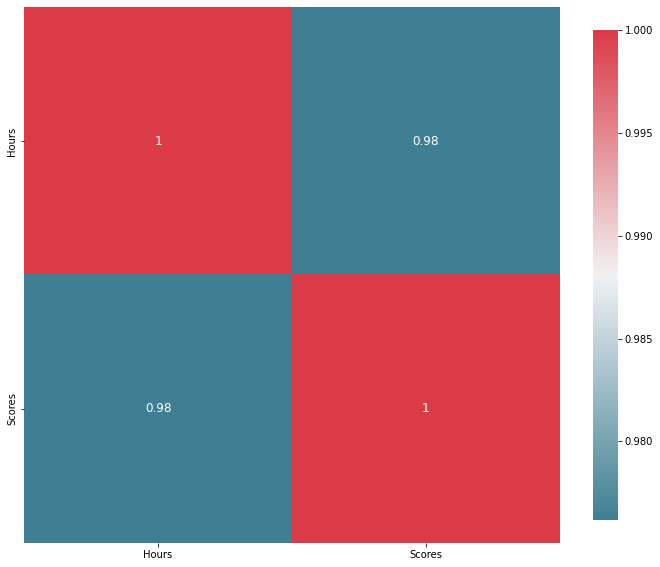

In [ ]:
#display the correlation between the two variables using the above function
plot_correlation_map(df)

In [ ]:
#reshape the columns
y = df['Scores'].values.reshape(-1,1)
X = df['Hours'].values.reshape(-1,1)

In [ ]:
#split the data using train test s

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30 )


In [ ]:
#create a regressor and fit the training data to it
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

---

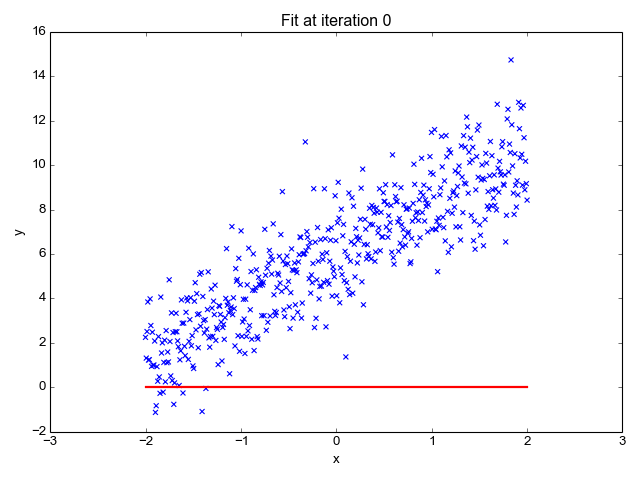

---

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[3.16718311]
[[9.74331031]]


* Y = f(X)

* Y = a * X + b

In [ ]:
#generate a prediction from X_test
y_pred = regressor.predict(X_test)


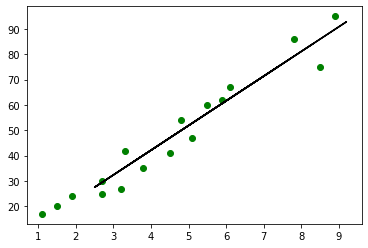

In [ ]:
#execute the code below
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()

In [ ]:
#calculate the r2 score and mse score and print them
print("MSE", mean_squared_error(y_test,y_pred))
print("R2", metrics.r2_score(y_test,y_pred))

MSE 31.363839476433306
R2 0.9544461300269669


In [ ]:
#change the code below so that is predicts the score of a student that worked 10 hours
test = np.array([10]).reshape(-1,1)
test_predict= regressor.predict(test)

print(test_predict)



[[100.60028623]]


# 2 - Multi Linear Regression 1

- import the "startups.csv" dataframe, vizualise it, check if any missing values are there (do the preprocessing part). Then, vizualise the distribution and the correlation between the "R&D Spend" and "Profit" columns.
- Continue by spliting the dataframe into training and testing datasets, train your model and generate a prediction. Print the R2 score of your model.
---
- importez le dataframe "startups.csv", visualisez-le, vérifiez s'il y a des valeurs manquantes (faites la partie prétraitement). Ensuite, visualisez la distribution et la corrélation entre les colonnes "R&D Spend" et "Profit".
- Continuez en divisant la dataframe en ensembles de données d'entraînement et de test, entraînez votre modèle et générez une prédiction. Afficher le score R2 de votre modèle.

In [ ]:
df1  = pd.read_csv("startups.csv")
df1


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
print(df1['Administration'].isnull().sum())
print(df1['R&D Spend'].isnull().sum())
print(df1['Marketing Spend'].isnull().sum())
print(df1['State'].isnull().sum())
print(df1['Profit'].isnull().sum())

0
2
3
0
0


In [ ]:
df1['R&D Spend'].fillna(df1['R&D Spend'].mean(), inplace= True)
df1['Marketing Spend'].fillna(df1['Marketing Spend'].mean(), inplace= True)
encoder= LabelEncoder()

df1['State']=encoder.fit_transform(df1['State'])
df1

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.200000,136897.80,471784.100000,2,192261.83
1,1,162597.700000,151377.59,443898.530000,0,191792.06
2,2,153441.510000,101145.55,407934.540000,1,191050.39
3,3,144372.410000,118671.85,383199.620000,2,182901.99
4,4,142107.340000,91391.77,366168.420000,1,166187.94
5,5,131876.900000,99814.71,362861.360000,2,156991.12
6,6,134615.460000,147198.87,127716.820000,0,156122.51
7,7,130298.130000,145530.06,323876.680000,1,155752.60
8,8,120542.520000,148718.95,311613.290000,2,152211.77
9,9,123334.880000,108679.17,304981.620000,0,149759.96


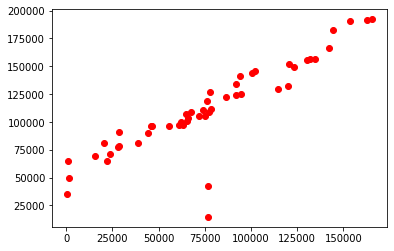

In [ ]:
plt.plot(df1['R&D Spend'],df1['Profit'],'ro')
plt.show()

In [ ]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
      )

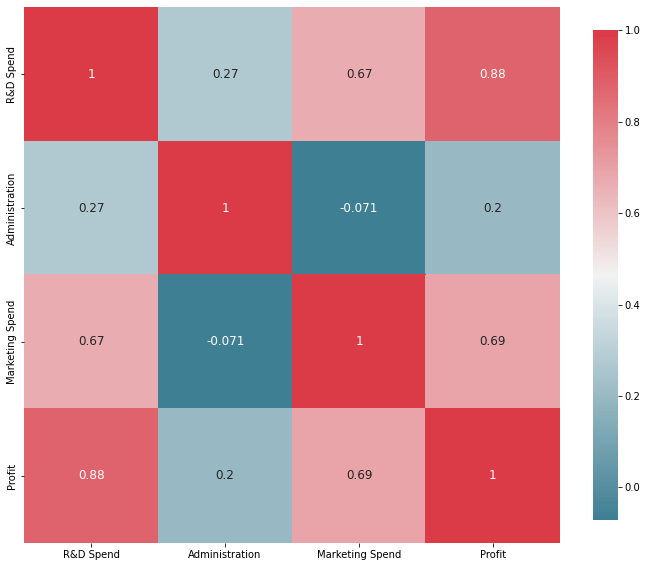

In [ ]:
plot_correlation_map(df1)

In [ ]:
y=df1.pop('Profit')
X=df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30 )


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

191565.15988017985
[-3.02591909e+03 -1.21711193e-01 -8.41146248e-03  2.01039110e-02
  1.43492413e+02]


In [ ]:
y_pred = model.predict(x_test)
print("MSE", mean_squared_error(y_test, y_pred))
print("R2",metrics.r2_score(y_test,y_pred))

NameError: ignored

In [ ]:
...

In [ ]:
...


# 3 - Multi Linear Regression 2

- Do the same with "titanic.csv" dataset to predict if a passenger survived or not.
---
- Faites de même avec le dataframe "titanic.csv" pour prédire si un passager a survécu ou non.

---
---

- Don't forget to do all the steps correctly (preprocessig, visualization, model training, testing, and finally the scores), one you calculate the score of your model, write your  conclusion.
- N'oubliez pas de faire toutes les étapes correctement (prétraitement, visualisation, apprentissage du modèle, test, et enfin les scores), après avoir calculé le score de votre modèle, écrivez votre conclusion.

In [ ]:
df=pd.read_csv("titanic.csv")


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
5,6,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877,8.4583,NaN,Q
6,7,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,NaN,S
8,9,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,NaN,S
9,10,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,NaN,C


In [ ]:
df= df.drop("Cabin", axis=1)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S
5,6,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877,8.4583,Q
6,7,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,S
7,8,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,S
8,9,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,S
9,10,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,887.000000,887.000000,704.000000,889.000000,887.000000,886.000000
mean,446.000000,0.385569,2.310034,29.722543,0.523060,0.378805,32.169229
std,257.353842,0.487004,0.836350,14.563191,1.103729,0.803998,49.749721
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.875000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     887 non-null    float64
 2   Pclass       887 non-null    float64
 3   Name         884 non-null    object 
 4   Sex          887 non-null    object 
 5   Age          704 non-null    float64
 6   SibSp        889 non-null    float64
 7   Parch        887 non-null    float64
 8   Ticket       883 non-null    object 
 9   Fare         886 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 76.7+ KB


In [ ]:
df[["Age","Name"]]

,Age,Name
0,22.0,"Braund, Mr. Owen Harris"
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,"Allen, Mr. William Henry"
...,...,...
886,27.0,"Montvila, Rev. Juozas"
887,19.0,"Graham, Miss. Margaret Edith"
888,NaN,"Johnston, Miss. Catherine Helen ""Carrie"""
889,26.0,"Behr, Mr. Karl Howell"


In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         4
Pclass           4
Name             7
Sex              4
Age            187
SibSp            2
Parch            4
Ticket           8
Fare             5
Embarked         2
dtype: int64

In [ ]:
df.isnull().sum().sum()

227

In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [ ]:
one_hot = pd.get_dummies(df["Sex"])

In [ ]:
one_hot

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
df= df.drop("Sex",axis=1)

In [ ]:
df = df.join(one_hot)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0.0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,0,1
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.2833,C85,C,1,0
2,3,1.0,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,C123,S,1,0
4,5,0.0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,NaN,S,0,1


In [ ]:
...

# 4 - Polynomial Linear Regression

- In this last test you'll be using polynomial Linear Regression to predict the salary of an employee based on his level of expertise (we will try to keep this one as easy as possible, as the goal is to learn how Polynomial Linear Regression models work). For this, drop the first column of the dataframe, we will be using one column as input and one as output.
- Dans ce dernier test, vous allez utiliser la régression linéaire polynomiale pour prédire le salaire d'un employé en fonction de son niveau d'expertise (nous allons essayer de rendre ce test aussi simple que possible, car le but est d'apprendre comment fonctionnent les modèles de régression linéaire polynomiale). Pour cela, laissez tomber la première colonne du datatframe, nous utiliserons une colonne comme entrée et une autre comme sortie.

---
---

- Again, don't forget to do all the needed steps before generating the model.
- Encore une fois, n'oubliez pas d'effectuer toutes les étapes nécessaires avant de générer le modèle.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Position_Salaries.csv")
df.drop("Position",axis=1,inplace=True)
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df["Level"].values.reshape(-1,1)
y=df["Salary"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)  

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_deg = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  97261933106.57632
R squared:  -15560.909297052212


In [ ]:
#execute the code below to visualize the graphe of the linear regression fitting into your data
plt.scatter(X,y,color='red')
plt.plot(X,lg.predict(X),color='blue')
plt.title('Truth or bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

NameError: ignored

- Now Create a polynomial Linear Regression model with degree=4 and train it.
- Créez maintenant un modèle de régression linéaire polynomial avec un degré = 4 et entraînez-le.


In [ ]:
...
...
...
...
...

In [ ]:
#execute the code below to visualize the graphe of the poly linear regression fitting into your data
X_grid=np.arange(min(X.values),max(X.values),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly.fit_transform(X)),color='blue')
plt.title('Truth or bluff(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

- Predict the salary of an employee with 3.5 years of experience using the simple linear regression and then using the polynomial linear regression, what do you see?
- Prédire le salaire d'un employé ayant 3.5 ans d'expérience en utilisant la régression linéaire simple, puis en utilisant la régression linéaire polynomiale, que voyez-vous ?

In [ ]:
test = np.array([3.5]).reshape(-1,1)
...

In [ ]:
...